In [1]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
digits = np.load('data.npz', mmap_mode='r')

In [3]:
digits.files

['train_X', 'train_y', 'test_X']

In [4]:
train_X = digits['train_X']

In [5]:
train_y = digits['train_y']

In [6]:
test_X = digits['test_X']

7.0


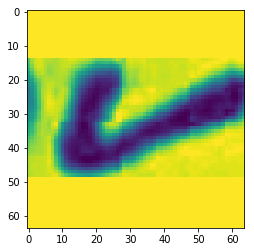

In [7]:
bitmap_index = 0
plt.imshow(train_X[bitmap_index,:].reshape(64, 64), interpolation=None)
print(train_y[bitmap_index])

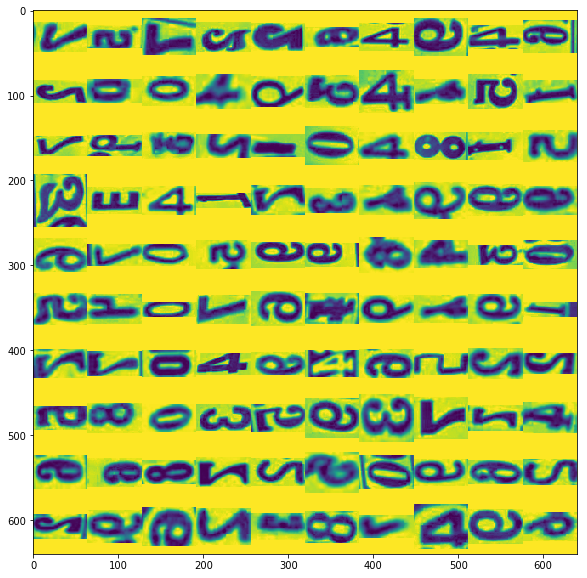

In [8]:
def gallery(array, ncols):
    nindex, height, width = array.shape
    nrows = nindex//ncols
    result = (array.reshape((nrows, ncols, height, width))
              .swapaxes(1,2)
              .reshape((height*nrows, width*ncols)))
    return result

ncols = 10
result = gallery(train_X.reshape((35000, 64, 64))[:ncols**2], ncols)
plt.figure(figsize=(10,10))
plt.imshow(result, interpolation=None)

In [9]:
from sklearn import svm

poly_svc = svm.SVC(kernel='poly', degree=6, C=5).fit(train_X, train_y)
y_pre = poly_svc.predict(test_X)
n = y_pre.shape[0]

In [10]:
import csv
with open('result_new_sumit.csv', 'w',encoding='utf8',newline='') as csvfile:
    resultwriter = csv.writer(csvfile,dialect='excel')
    resultwriter.writerow(["Id", "Label"])
    for i in range(n):
        resultwriter.writerow([i + 1, y_pre[i]])